<a href="https://colab.research.google.com/github/nlemoff/data102project/blob/main/Checkpoint2_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

emissions_df = pd.read_csv('state_emissions.csv')
energy_df = pd.read_csv('state_wise_energy_all_sectors.csv')
temperature_df = pd.read_csv('temperature_data_2023.csv')

In [2]:
emissions_df.head()

,period,stateid,stateDescription,fuelid,fuelDescription,co2-rate-lbs-mwh,co2-thousand-metric-tons,nox-rate-lbs-mwh,nox-short-tons,so2-rate-lbs-mwh,so2-short-tons,co2-rate-lbs-mwh-units,co2-thousand-metric-tons-units,nox-rate-lbs-mwh-units,nox-short-tons-units,so2-rate-lbs-mwh-units,so2-short-tons-units
0,2023,AZ,Arizona,COL,Coal,NaN,12863,NaN,9238,NaN,6854,pounds per megawatthour,thousand metric tons,pounds per megawatthour,short tons,pounds per megawatthour,short tons
1,2023,WY,Wyoming,ALL,Total,1864.0,36580,1.4,31178,1.1,24209,pounds per megawatthour,thousand metric tons,pounds per megawatthour,short tons,pounds per megawatthour,short tons
2,2023,WY,Wyoming,PET,Petroleum,NaN,37,NaN,22,NaN,13,pounds per megawatthour,thousand metric tons,pounds per megawatthour,short tons,pounds per megawatthour,short tons
3,2023,WY,Wyoming,OTH,Other,NaN,0,NaN,3436,NaN,8,pounds per megawatthour,thousand metric tons,pounds per megawatthour,short tons,pounds per megawatthour,short tons
4,2023,WY,Wyoming,NG,Natural Gas,NaN,1516,NaN,2489,NaN,9,pounds per megawatthour,thousand metric tons,pounds per megawatthour,short tons,pounds per megawatthour,short tons


In [3]:
ca_emissions = emissions_df[emissions_df['stateid'] == 'CA']
ca_2023_emissions = ca_emissions[ca_emissions['period'] == 2023]
ca_2023_emissions_clean = ca_2023_emissions[
    (ca_2023_emissions['stateid'] == 'CA') &
    (ca_2023_emissions['fuelid'] == 'ALL')
][['period', 'co2-thousand-metric-tons']]

print("Cleaned emissions data:")
print(ca_2023_emissions_clean)
print("\nData types:")
print(ca_2023_emissions_clean.dtypes)

Cleaned emissions data:
     period  co2-thousand-metric-tons
240    2023                     43360

Data types:
period                      int64
co2-thousand-metric-tons    int64
dtype: object


In [4]:
ca_2023_emissions_clean

,period,co2-thousand-metric-tons
240,2023,43360


In [5]:
all_months = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
all_months_df = pd.DataFrame({'month': all_months.strftime('%Y-%m')})
all_months_df.head()

,month
0,2023-01
1,2023-02
2,2023-03
3,2023-04
4,2023-05


In [6]:
temperature_df.head()

,date,datatype,station,attributes,value
0,2023-01-01,TAVG,GHCND:USR0000CABS,",,U,",64
1,2023-01-01,TAVG,GHCND:USR0000CSFD,",,U,",123
2,2023-01-01,TAVG,GHCND:USR0000CSEC,",,U,",45
3,2023-01-01,TAVG,GHCND:USR0000CSDD,",,U,",-54
4,2023-01-01,TAVG,GHCND:USR0000CSDC,",,U,",29


In [7]:
# Convert to Celsius and handle missing months
temperature_df['month'] = temperature_df['date'].apply(lambda x: x[:7])
monthly_temp = temperature_df[['month', 'value']].groupby('month').mean()
monthly_temp['value'] = (monthly_temp['value'] - 32) * 5/9  # Convert F to C

# Create a complete month range
all_months = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
all_months_df = pd.DataFrame({'month': all_months.strftime('%Y-%m')})

monthly_temp_complete = pd.merge(all_months_df, monthly_temp, on='month', how='left')

print("Monthly average temperatures (Celsius):")
print(monthly_temp_complete)
print("\nMissing months:")
print(monthly_temp_complete[monthly_temp_complete['value'].isna()])

Monthly average temperatures (Celsius):
      month       value
0   2023-01    6.022309
1   2023-02    5.218220
2   2023-03    8.954648
3   2023-04   40.973069
4   2023-05   59.024418
5   2023-06   74.128738
6   2023-07  113.862444
7   2023-08  103.899591
8   2023-09   79.073974
9   2023-10   64.043716
10  2023-11   35.190453
11  2023-12   25.527321

Missing months:
Empty DataFrame
Columns: [month, value]
Index: []


In [8]:
# Check energy data
print("Energy consumption data:")
print(energy_df[energy_df['stateid'] == 'CA'][['period', 'sales']].head(12))
print("\nData types:")
print(energy_df.dtypes)

Energy consumption data:
     period        sales
0   2024-01  20040.74935
1   2023-12  18660.12634
2   2023-11  18479.20564
3   2023-10  20390.47299
4   2023-09  22466.03859
5   2023-08  25101.55563
6   2023-07  23048.26218
7   2023-06  19333.43379
8   2023-05  18288.41200
9   2023-04  16261.33366
10  2023-03  19506.41869
11  2023-02  17440.48579

Data types:
period               object
stateid              object
stateDescription     object
sectorid             object
sectorName           object
sales               float64
sales-units          object
dtype: object


In [9]:
# only include 2023
energy_clean = energy_df[
    (energy_df['stateid'] == 'CA') &
    (energy_df['period'].str.startswith('2023'))
].copy()

energy_clean['month'] = pd.to_datetime(energy_clean['period']).dt.strftime('%Y-%m')
final_df = pd.merge(monthly_temp, energy_clean[['month', 'sales']], on='month')
final_df = final_df.rename(columns={'value': 'temperature', 'sales': 'energy_demand'})

final_df['emissions'] = ca_2023_emissions_clean['co2-thousand-metric-tons'].values[0] / 12

print("Final dataset for causal analysis:")
print(final_df)
print("\nData types:")
print(final_df.dtypes)

# Basic correlations
print("\nCorrelations:")
print(final_df[['temperature', 'energy_demand', 'emissions']].corr())

Final dataset for causal analysis:
      month  temperature  energy_demand    emissions
0   2023-01     6.022309    20504.70675  3613.333333
1   2023-02     5.218220    17440.48579  3613.333333
2   2023-03     8.954648    19506.41869  3613.333333
3   2023-04    40.973069    16261.33366  3613.333333
4   2023-05    59.024418    18288.41200  3613.333333
5   2023-06    74.128738    19333.43379  3613.333333
6   2023-07   113.862444    23048.26218  3613.333333
7   2023-08   103.899591    25101.55563  3613.333333
8   2023-09    79.073974    22466.03859  3613.333333
9   2023-10    64.043716    20390.47299  3613.333333
10  2023-11    35.190453    18479.20564  3613.333333
11  2023-12    25.527321    18660.12634  3613.333333

Data types:
month             object
temperature      float64
energy_demand    float64
emissions        float64
dtype: object

Correlations:
               temperature  energy_demand  emissions
temperature       1.000000       0.695788        NaN
energy_demand     0.695788  

First Stage Results (Temperature -> Energy Demand):
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.753e+04    963.128     18.203      0.000    1.54e+04    1.97e+04
temperature    47.2421     15.421      3.063      0.012      12.881      81.603


/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


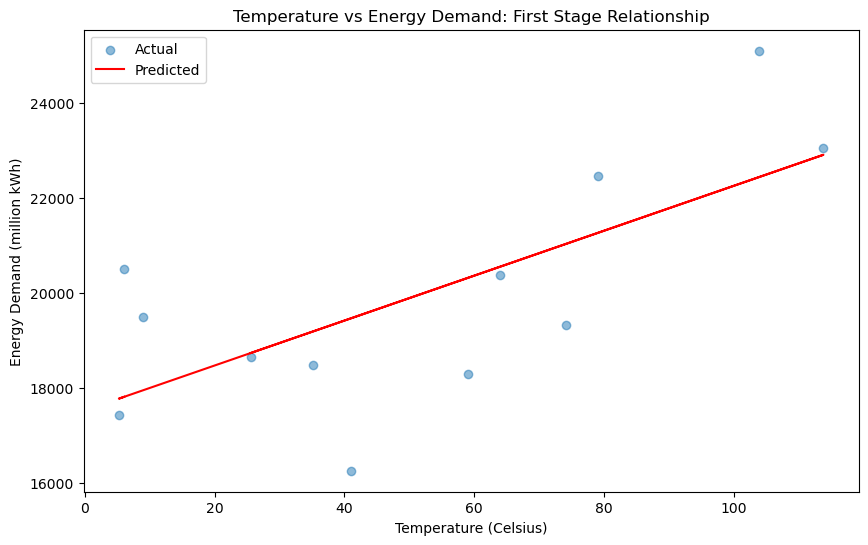

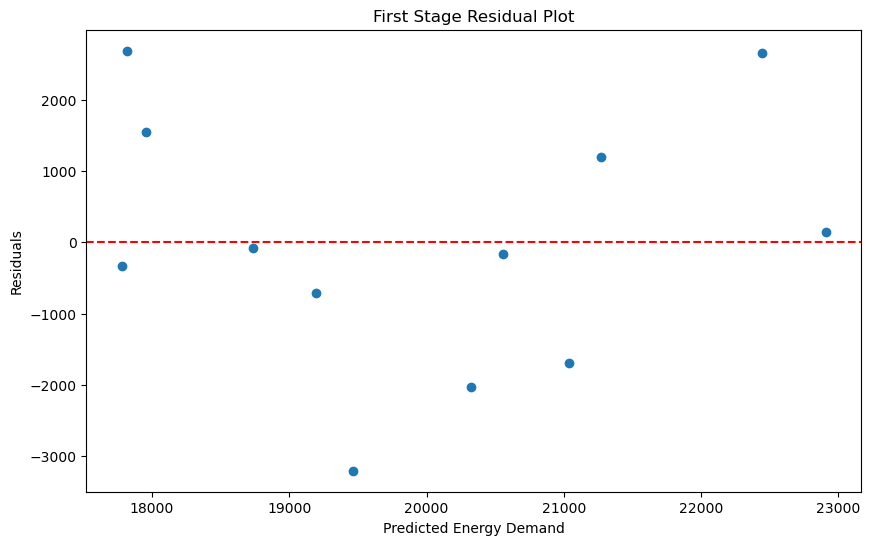

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

X_first = sm.add_constant(final_df['temperature'])
first_stage = sm.OLS(final_df['energy_demand'], X_first).fit()

energy_demand_predicted = first_stage.predict(X_first)

print("First Stage Results (Temperature -> Energy Demand):")
print(first_stage.summary().tables[1])

import matplotlib.pyplot as plt

# Plot actual vs predicted energy demand
plt.figure(figsize=(10, 6))
plt.scatter(final_df['temperature'], final_df['energy_demand'], alpha=0.5, label='Actual')
plt.plot(final_df['temperature'], energy_demand_predicted, color='red', label='Predicted')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Energy Demand (million kWh)')
plt.title('Temperature vs Energy Demand: First Stage Relationship')
plt.legend()
plt.show()

# Plot residuals
residuals = first_stage.resid
plt.figure(figsize=(10, 6))
plt.scatter(energy_demand_predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Energy Demand')
plt.ylabel('Residuals')
plt.title('First Stage Residual Plot')
plt.show()

Our first stage ordinary least squares model shows a very loose positive correlation between temperature and energy demand. The model does appear to fit well due to the decent scatter of the residuals.

In [32]:
# Second stage regression
X_second = sm.add_constant(energy_demand_predicted)
second_stage = sm.OLS(final_df['emissions'], X_second).fit()
print(second_stage.summary())


                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     9.384
Date:                Fri, 06 Dec 2024   Prob (F-statistic):             0.0120
Time:                        22:07:42   Log-Likelihood:                -86.027
No. Observations:                  12   AIC:                             176.1
Df Residuals:                      10   BIC:                             177.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.093e-12   1183.695   3.46e-15      1.0

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


let's try distributing emissions proportionally


In [27]:
# Distribute annual emissions based on energy demand
total_energy = energy_clean['sales'].sum()  # Total energy demand for 2023
final_df['emissions'] = final_df['energy_demand'] / total_energy * ca_2023_emissions_clean['co2-thousand-metric-tons'].values[0]

print("Updated emissions data:")
print(final_df[['month', 'emissions']])


Updated emissions data:
      month    emissions
0   2023-01  3712.553894
1   2023-02  3157.750277
2   2023-03  3531.805236
3   2023-04  2944.254621
4   2023-05  3311.274626
5   2023-06  3500.484829
6   2023-07  4173.086528
7   2023-08  4544.853005
8   2023-09  4067.669928
9   2023-10  3691.870887
10  2023-11  3345.819459
11  2023-12  3378.576711


In [28]:
# Add squared temperature term for non-linear effects
final_df['temperature_squared'] = final_df['temperature'] ** (2)

# First-stage regression (include non-linear term)
X_first = sm.add_constant(final_df[['temperature', 'temperature_squared']])
first_stage_square = sm.OLS(final_df['energy_demand'], X_first).fit()

# Predict energy demand
final_df['energy_demand_predicted_square'] = first_stage_square.predict(X_first)

# Second-stage regression
X_second = sm.add_constant(final_df['energy_demand_predicted_square'])
second_stage = sm.OLS(final_df['emissions'], X_second).fit()

# Print results
print("Second Stage Results (Energy Demand -> Emissions):")
print(second_stage.summary())


Second Stage Results (Energy Demand -> Emissions):
                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000949
Time:                        22:04:37   Log-Likelihood:                -83.142
No. Observations:                  12   AIC:                             170.3
Df Residuals:                      10   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
# Add squared temperature term for non-linear effects
final_df['temperature_sqrt'] = final_df['temperature'] ** (1/2)

# First-stage regression (include non-linear term)
X_first = sm.add_constant(final_df[['temperature', 'temperature_squared']])
first_stage_sqrt = sm.OLS(final_df['energy_demand'], X_first).fit()

# Predict energy demand
final_df['energy_demand_predicted_sqrt'] = first_stage_sqrt.predict(X_first)

# Second-stage regression
X_second = sm.add_constant(final_df['energy_demand_predicted_sqrt'])
second_stage = sm.OLS(final_df['emissions'], X_second).fit()

# Print results
print("Second Stage Results (Energy Demand -> Emissions):")
print(second_stage.summary())

Second Stage Results (Energy Demand -> Emissions):
                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000949
Time:                        22:04:43   Log-Likelihood:                -83.142
No. Observations:                  12   AIC:                             170.3
Df Residuals:                      10   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
# Add squared temperature term for non-linear effects
final_df['temperature_exp'] = np.exp(final_df['temperature']) 

# First-stage regression (include non-linear term)
X_first = sm.add_constant(final_df[['temperature', 'temperature_squared']])
first_stage_exp = sm.OLS(final_df['energy_demand'], X_first).fit()

# Predict energy demand
final_df['energy_demand_predicted_exp'] = first_stage.predict(X_first)

# Second-stage regression
X_second = sm.add_constant(final_df['energy_demand_predicted_exp'])
second_stage = sm.OLS(final_df['emissions'], X_second).fit()

# Print results
print("Second Stage Results (Energy Demand -> Emissions):")
print(second_stage.summary())

Second Stage Results (Energy Demand -> Emissions):
                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000949
Time:                        21:58:48   Log-Likelihood:                -83.142
No. Observations:                  12   AIC:                             170.3
Df Residuals:                      10   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Add squared temperature term for non-linear effects
final_df['temperature_log'] = np.log(final_df['temperature'])

# First-stage regression (include non-linear term)
X_first = sm.add_constant(final_df[['temperature', 'temperature_squared']])
first_stage_log = sm.OLS(final_df['energy_demand'], X_first).fit()

# Predict energy demand
final_df['energy_demand_predicted_log'] = first_stage_log.predict(X_first)

# Second-stage regression
X_second = sm.add_constant(final_df['energy_demand_predicted_log'])
second_stage = sm.OLS(final_df['emissions'], X_second).fit()

# Print results
print("Second Stage Results (Energy Demand -> Emissions):")
print(second_stage.summary())

Second Stage Results (Energy Demand -> Emissions):
                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000949
Time:                        21:58:54   Log-Likelihood:                -83.142
No. Observations:                  12   AIC:                             170.3
Df Residuals:                      10   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:

# First-stage regression (include non-linear term)
first_stage= sm.OLS(final_df['energy_demand'], X_first).fit()

# Predict energy demand
final_df['energy_demand_predicted'] = first_stage.predict(X_first)

# Second-stage regression
X_second = sm.add_constant(final_df['energy_demand_predicted_log'])
second_stage = sm.OLS(final_df['emissions'], X_second).fit()

# Print results
print("Second Stage Results (Energy Demand -> Emissions):")
print(second_stage.summary())

Second Stage Results (Energy Demand -> Emissions):
                            OLS Regression Results                            
Dep. Variable:              emissions   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000949
Time:                        21:58:56   Log-Likelihood:                -83.142
No. Observations:                  12   AIC:                             170.3
Df Residuals:                      10   BIC:                             171.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/Users/areeyatipyasothi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


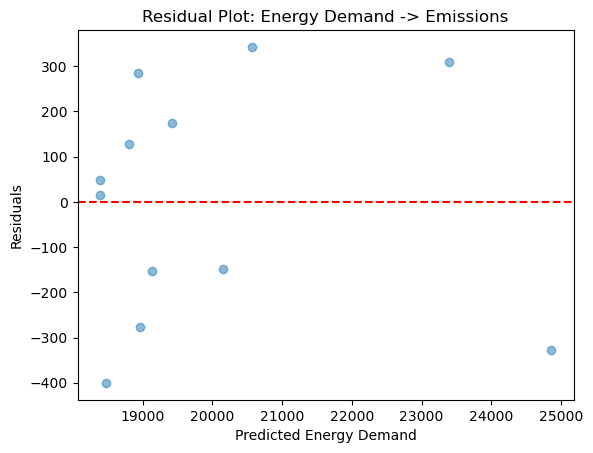

Breusch-Pagan Test Results: (1.872583007901873, 0.17117953739248581, 1.8490233090658243, 0.20376457780510587)


In [25]:
# Residuals of second stage
residuals = second_stage.resid

# Residual plot
plt.scatter(final_df['energy_demand_predicted'], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Energy Demand')
plt.ylabel('Residuals')
plt.title('Residual Plot: Energy Demand -> Emissions')
plt.show()

# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X_second)
print("Breusch-Pagan Test Results:", bp_test)


<Figure size 1000x600 with 0 Axes>

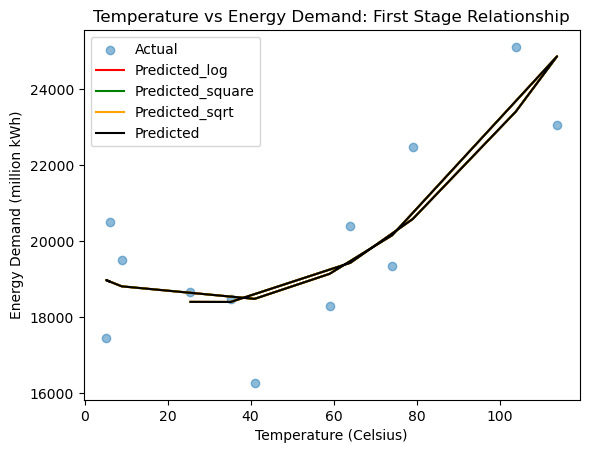

In [20]:
# Plot actual vs predicted energy demand
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.scatter(final_df['temperature'], final_df['energy_demand'], alpha=0.5, label='Actual')
ax.plot(final_df['temperature'], final_df['energy_demand_predicted_log'], color='red', label='Predicted_log')
ax.plot(final_df['temperature'], final_df['energy_demand_predicted_square'], color='green', label='Predicted_square')
ax.plot(final_df['temperature'], final_df['energy_demand_predicted_sqrt'], color='orange', label='Predicted_sqrt')
ax.plot(final_df['temperature'], final_df['energy_demand_predicted'], color='black', label='Predicted')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Energy Demand (million kWh)')
plt.title('Temperature vs Energy Demand: First Stage Relationship')
plt.legend()
plt.show()

In [ ]:
final_df.head()

From our first stage model, we were able to see that some positive relationship between energy demand and temperature existed. We were able to find a better fitting model by using the square root of energy demand vs temperature, which we can clearly see performs better as indicated by the AIC and BIC and the slightly higher log-likelihood. 

There are limitations in our method, as we are extrapolating the emissions based on demand over the whole year. This does not take into account the possibility of energy prodution efficiency being different across different months (ie some months having a higher proportion created by renewable energy), and it does not fully dicount the confounder of seasonal changes in temperature. In addition, we have not taken into account the vast space and spread out nature of California, and the nonuniform nature of emissions across the state. Furthermore we are unable to account for levels of industrial activity through the state. Thus some next steps we will take is using the disaggregated time and place data which will potentially allow us to account for these changes in temperature as well as industrial impact across the state. We can also isolate times were the temperature rises above a certain level and compare energy use during those times to similar periods where there are more average temperatures. 

However our inital results do tell us as temperature increases, the demand for energy increases. Due to this, we can recommend having reserves or alternatives to energy use during times of high temperature as to reduce stress on the grid. 

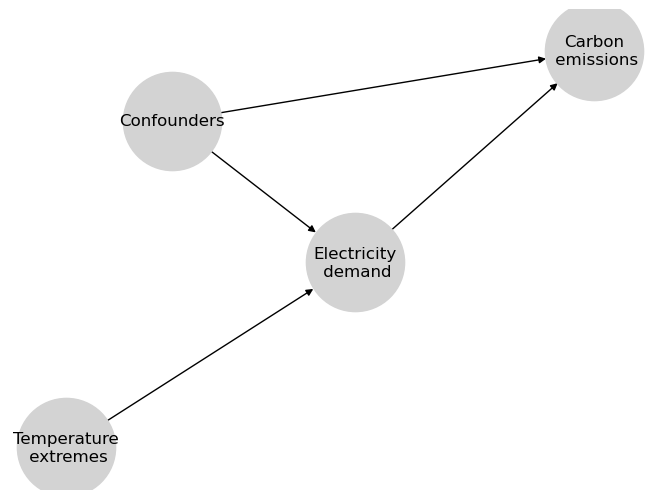

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
        
# Create causal dag
cg = nx.DiGraph()
# Variable strings
elde = 'Electricity\n demand'
caem = 'Carbon\n emissions'
temex = 'Temperature\n extremes'
#confounders
ecac = 'Economic\nActivity'
enpo = 'Energy\npolicies'
inim = 'Industrial\nimpact'
cg.add_edges_from([(elde, caem), (temex, elde), ('Confounders',elde),('Confounders',caem)])
nx.draw(cg, with_labels=True,node_size=5000, node_color='lightgray')